
Importing all the Required Libraries and data by mounting from google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('gdrive')
import os


Mounted at gdrive


In [ ]:
data_path = "/content/gdrive/My Drive/intern_dataset/"
data_file = os.path.join(data_path, "heart_failure_clinical_records_dataset.csv")
df = pd.read_csv(data_file)


In [ ]:
### To check the columns rows and datas of table
df.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Selecting the x and y from dataset

In [ ]:

y = df['DEATH_EVENT']

In [ ]:
X = df.drop(["DEATH_EVENT"], axis=1).values
X = (X -X.mean())/X.std() 

In [ ]:
print(X)
print(y)

[[-0.28129909 -0.28226022 -0.27480189 ... -0.2822474  -0.28226022
  -0.28220896]
 [-0.28155539 -0.28226022 -0.18152151 ... -0.2822474  -0.28226022
  -0.28218333]
 [-0.28142724 -0.28226022 -0.28038923 ... -0.2822474  -0.2822474
  -0.28217051]
 ...
 [-0.28168354 -0.28226022 -0.25586132 ... -0.28226022 -0.28226022
  -0.27869765]
 [-0.28168354 -0.28226022 -0.25133763 ... -0.2822474  -0.2822474
  -0.27867202]
 [-0.28161947 -0.28226022 -0.27974848 ... -0.2822474  -0.2822474
  -0.27860794]]
0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [215]:
import numpy as np

def sigmoid(z):
  sig = 1.0/(1+np.exp(-z))
  return sig

# Linear  regression model 
class LogisticRegression:
    def __init__(self, alpha =0.01, C = 1.0, penalty = "l2"):

        self.alpha = alpha # learning rate 
        self.hist_loss =[] # empty list for loss histroy 
        self.hist_param = []  # empty list for parameter updates
        self.C = C  # weight of the penalty , see the lecture what happens if C is very large and very small 
        self.penalty = penalty  # types of penalty , l1 and l2 

    def fit_gd(self,x, y, iterations):

      """
      This fit function works for a gradident decent
      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        z = np.dot(x, self.theta) 
        h = sigmoid(z) #1.0/(1+np.exp(-z))  hypothers 
        error = h - y
        if self.penalty =="l1":
          loss = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) +self.C/(2*m)*np.linalg.norm(self.theta)
          self.theta = self.theta - (self.alpha * (1/m) * np.dot(x.T, error)+self.C/(2*m))
        else:
          loss = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) +self.C/(2*m)*np.dot(self.theta.T, self.theta)
          self.theta = self.theta - (self.alpha * (1/m) * np.dot(x.T, error)+self.C/(m)*self.theta)
        self.hist_loss.append(loss)
        if it%100 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

    def fit_sgd(self,x, y, iterations):
      """
      This fit function works for a  Stocashtic gradident Decent, where we uptimized the parameters using 
      single observation 

      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        loss = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)  # updating  with one sample at a time
            x_i = x[rand_ind,:] 
            y_i = y[rand_ind]
            z = np.dot(x_i, self.theta)
            h = sigmoid(z) #1.0/(1+np.exp(-z))
            error = h - y_i
            loss += - np.sum(y_i * np.log(h) + (1 - y_i) * np.log(1 - h))+self.C/(2*m)*np.dot(self.theta.T, self.theta)
            self.theta = self.theta - (self.alpha*np.dot(x_i.T, error)+self.C/(m)*self.theta)
          
        self.hist_loss.append(loss)
        if it%200 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

    def fit_batch_sgd(self, x, y, iterations, batch_size = 5):
        """
        This fit function works for a  Stocashtic gradident Decent with batch, where we uptimized the parameters using handful of samples. It is very efficient 
        for large dataset
      
        x : input feature  (m , d), where m = number of data points and d = dimension of the data 
        y : target value (m ,)
        interations : int , number of interation point) 
        """ 
        self.theta =  np.random.rand(x.shape[1])
        m = y.size
        n_batch = int(x.shape[0]/batch_size)
        for it in range(iterations):
              rand_indices = np.random.choice(range(m), size= batch_size) 
              x_b = x[rand_indices] 
              y_b = y[rand_indices]
              z = np.dot(x_b, self.theta)
              h = sigmoid(z)
              error = h - y_b
              if self.penalty =="l1":
                loss =- np.sum(y_b * np.log(h) + (1 - y_b) * np.log(1 - h)) +self.C/(2*m)*np.linalg.norm(self.theta)
                self.theta = self.theta - (self.alpha * np.dot(x_b.T, error)+self.C/(2*m))
              else:
                loss =- np.sum(y_b * np.log(h) + (1 - y_b) * np.log(1 - h)) +self.C/(2*m)*np.dot(self.theta.T, self.theta)
                self.theta = self.theta - (self.alpha * np.dot(x_b.T, error)+self.C/(m)*self.theta)
              # # loss =- np.sum(y_b * np.log(h) + (1 - y_b) * np.log(1 - h)) + self.C/(2*m)*np.linalg.norm(self.theta)
              # # self.theta = self.theta - (self.alpha * np.dot(x_b.T, error)+self.C/(m)*self.theta)
              self.hist_loss.append(loss)
              if it%100 ==0:
                print(f"it: {it}, train_loss: {loss})")
              self.hist_param.append(self.theta)

    
    def predict_prob(self, X):
        z = np.dot(X, self.theta)
        p = 1.0/(1. +np.exp(-z))
        return p

    def predict(self, X, threshold = 0.5):
        p = self.predict_prob(X)
        yhat = [1 if i >=0.5 else 0 for i in p]
        return yhat


For Gradient Descent

In [ ]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha, C =0.23, penalty="l1") 
lm.fit_gd(X, y, iterations=iterations)
yhat = lm.predict_prob(X)


it: 0, train_loss: 1.328736096367319)
it: 100, train_loss: 0.6491515366956657)
it: 200, train_loss: 0.6410553189575927)
it: 300, train_loss: 0.6372264910858197)
it: 400, train_loss: 0.6340570659826555)
it: 500, train_loss: 0.6315149991288651)
it: 600, train_loss: 0.6295668498293159)
it: 700, train_loss: 0.6281755444913361)
it: 800, train_loss: 0.6273028774295585)
it: 900, train_loss: 0.6269108753446023)
it: 1000, train_loss: 0.6269628148304732)
it: 1100, train_loss: 0.6274238705620419)
it: 1200, train_loss: 0.6282613235048398)
it: 1300, train_loss: 0.6294443487885755)
it: 1400, train_loss: 0.6309436432863269)
it: 1500, train_loss: 0.6327313064168554)
it: 1600, train_loss: 0.6347811018277909)
it: 1700, train_loss: 0.637068809387055)
it: 1800, train_loss: 0.6395723810024219)
it: 1900, train_loss: 0.6422718738872515)


Plot between predicted value  and orginal value 


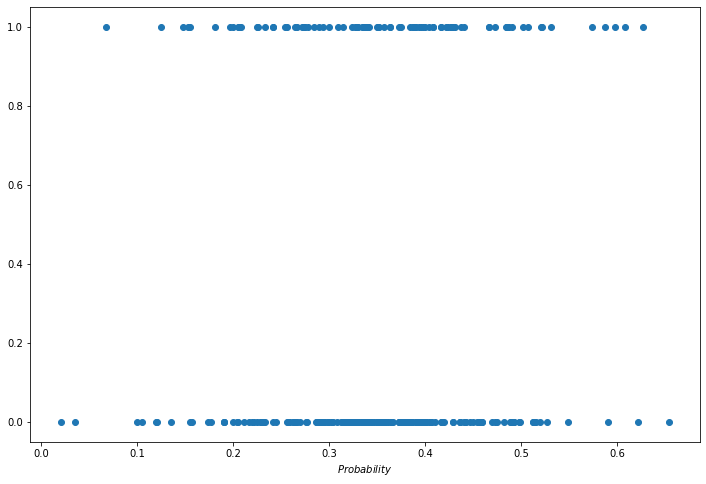

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat, y)
plt.xlabel("$Probability $")
plt.show()

Plot training loss function with iterations

Text(0, 0.5, '$J(\\theta)$')

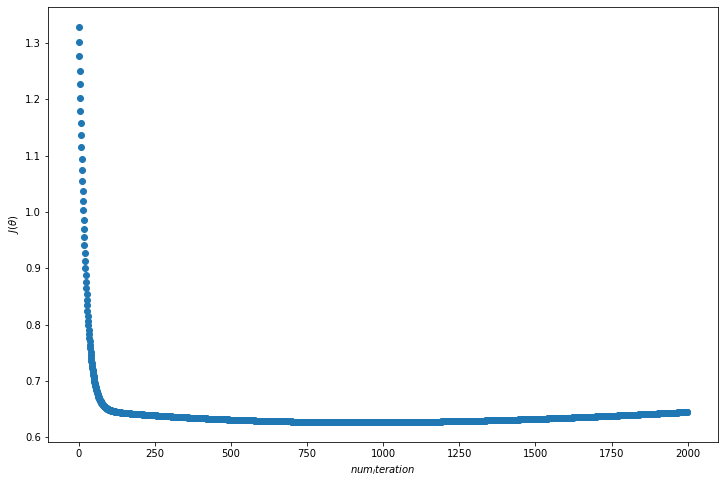

In [ ]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')

Evaulating theta0 theta1 and Jtheta

In [ ]:
theta0_vals = np.array(lm.hist_param)[:,0]
theta1_vals = np.array(lm.hist_param)[:,1]
J_vals = lm.hist_loss

Plot theta1, theta2 and J(theta) , 3d plot

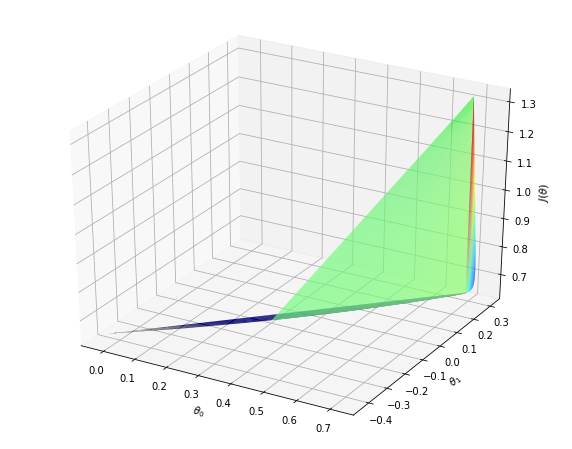

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta0_vals, theta1_vals,J_vals, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()

For Stochastic Gradient Descent

In [196]:
alpha = 0.00001 #Step size
iterations = 1000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha, C =0.23, penalty="l2") 
lm.fit_sgd(X, y, iterations=iterations)
yhat = lm.predict_prob(X)



it: 0, train_loss: 387.3610235308821)
it: 200, train_loss: 205.38413789773452)
it: 400, train_loss: 205.55251498345373)
it: 600, train_loss: 206.12710276725917)
it: 800, train_loss: 205.6814603280177)


Plot between predicted value  and orginal value 


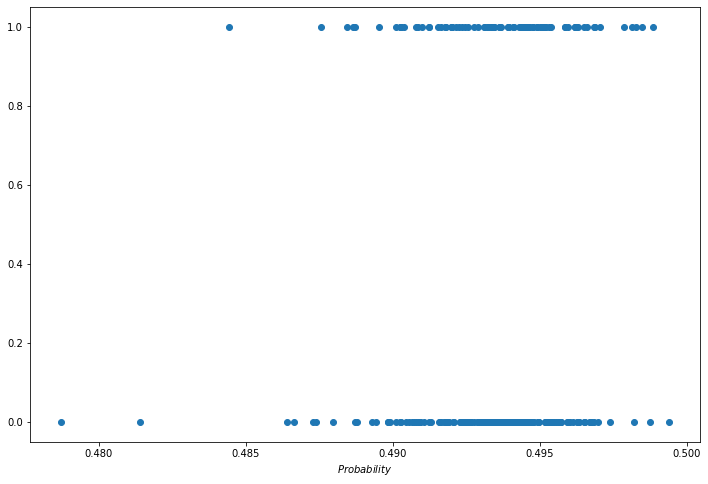

In [197]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat, y)
plt.xlabel("$Probability $")
plt.show()

Plot training loss function with iterations

Text(0, 0.5, '$J(\\theta)$')

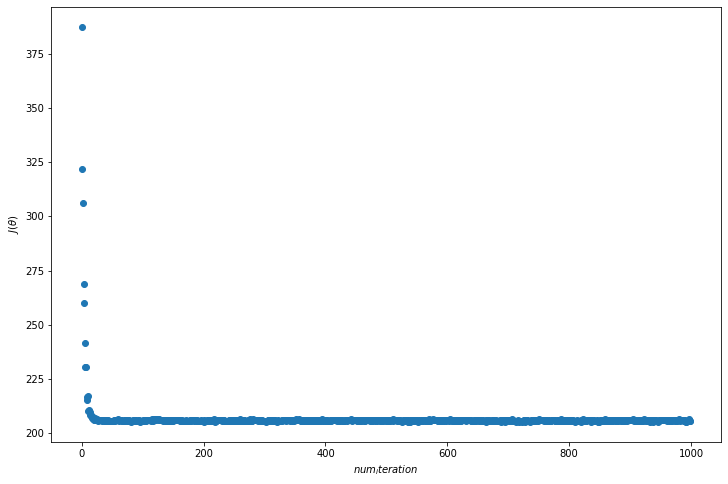

In [198]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')

Evaulating theta0 theta1 and Jtheta

In [ ]:
theta0_vals = np.array(lm.hist_param)[:,0]
theta1_vals = np.array(lm.hist_param)[:,1]
J_vals = lm.hist_loss

Plot theta1, theta2 and J(theta) , 3d plot

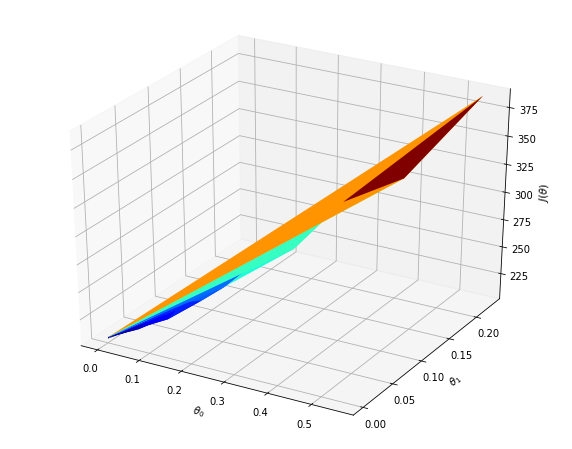

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta0_vals, theta1_vals,J_vals, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()

For Mini Batch Gradient Descent

In [216]:
alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha, C =0.23, penalty="l2") 
lm.fit_batch_sgd(X, y, iterations=iterations)
yhat = lm.predict_prob(X)


it: 0, train_loss: 5.745615404522541)
it: 100, train_loss: 3.229657269837637)
it: 200, train_loss: 3.31111654331152)
it: 300, train_loss: 3.8252967541296496)
it: 400, train_loss: 2.7593291381455876)
it: 500, train_loss: 2.6205904960299597)
it: 600, train_loss: 3.4392364402756894)
it: 700, train_loss: 3.522535206223982)
it: 800, train_loss: 1.8209906161760787)
it: 900, train_loss: 2.0142272524046967)
it: 1000, train_loss: 5.096703233555856)
it: 1100, train_loss: 2.6680589251704143)
it: 1200, train_loss: 5.359321737227251)
it: 1300, train_loss: 1.8696647260398154)
it: 1400, train_loss: 2.2064771786952004)
it: 1500, train_loss: 4.014405671258253)
it: 1600, train_loss: 2.5703876636931966)
it: 1700, train_loss: 2.575337024345585)
it: 1800, train_loss: 2.0111819352834326)
it: 1900, train_loss: 3.877033540920553)


Plot between predicted value  and orginal value 


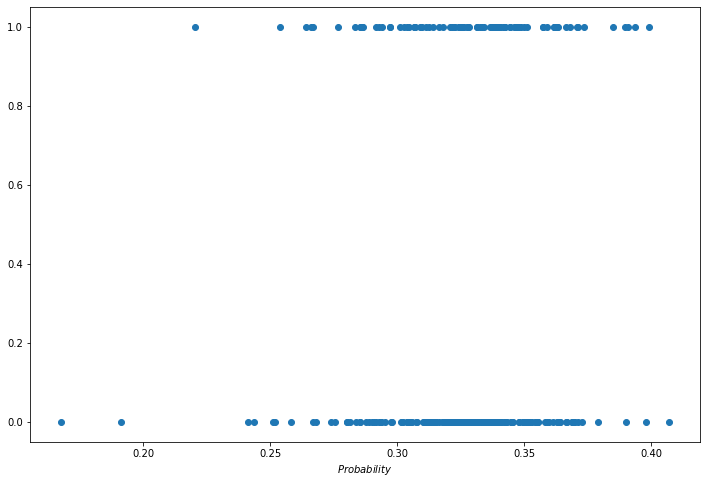

In [217]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat, y)
plt.xlabel("$Probability $")
plt.show()

[link text](https://)Plot training loss function with iterations


Text(0, 0.5, '$J(\\theta)$')

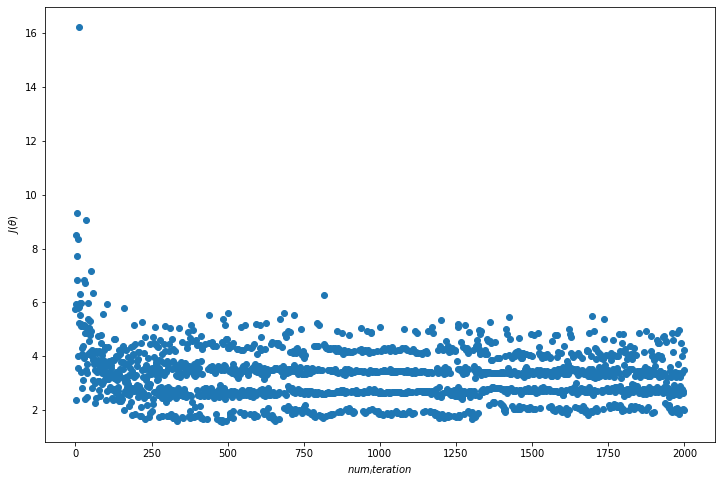

In [218]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')

Evaulating theta0 theta1 and Jtheta

In [ ]:
theta0_vals = np.array(lm.hist_param)[:,0]
theta1_vals = np.array(lm.hist_param)[:,1]
J_vals = lm.hist_loss

Plot theta1, theta2 and J(theta)  , 3d plot 

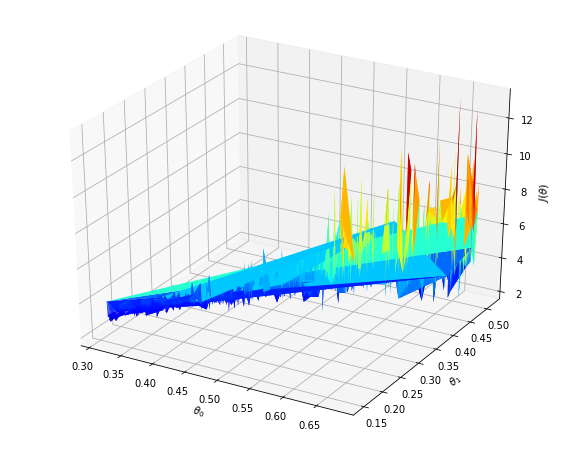

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta0_vals, theta1_vals,J_vals, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()